In [1]:
%cd ..

/Users/raiota/git/github.com/raiota/RCGA


In [2]:
from ga_tools import *
from benchmarks import *

from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import ArtistAnimation

# Optimize Example and Sample Usage

## Ackley function

In [3]:
GEN = 1000
N_DIM = 10
G_MIN = -32
G_MAX = 32
POP_SIZE = 300
PARENT_NUM = 50
CHILD_NUM = 200

EVALTYPE = alternation.evalType.MINIMIZE
CROSSTYPE = crossover.crossoverType.E_UNDX
RANDOMTYPE = crossover.randomType.UNIFORM

In [4]:
# object for JGG alternation
pop = alternation.JGG(dim=N_DIM,
                      evaluation_func=ackley, evaluation_type=EVALTYPE,
                      gene_min=G_MIN, gene_max=G_MAX,
                      crossover_type=CROSSTYPE,
                      random_type=RANDOMTYPE,
                      pop_size=POP_SIZE, parent_num=PARENT_NUM, child_num=CHILD_NUM,
                      seed=64)

# make initial population
pop.init_population()

# evaluate initial population
pop.eval()

In [5]:
generation = []
stats_min = []
stats_max = []
stats_ave = []

generation.append(0)
stats_min.append(numpy.min([ind.fitness for ind in pop.population]))
stats_max.append(numpy.max([ind.fitness for ind in pop.population]))
stats_ave.append(numpy.average([ind.fitness for ind in pop.population]))

for i in tqdm(range(GEN), desc="[Evolution]"):
    pop.generation_step()
    
    generation.append(i+1)
    stats_min.append(numpy.min([ind.fitness for ind in pop.population]))
    stats_max.append(numpy.max([ind.fitness for ind in pop.population]))
    stats_ave.append(numpy.average([ind.fitness for ind in pop.population]))

[Evolution]: 100%|██████████| 1000/1000 [00:52<00:00, 18.96it/s]


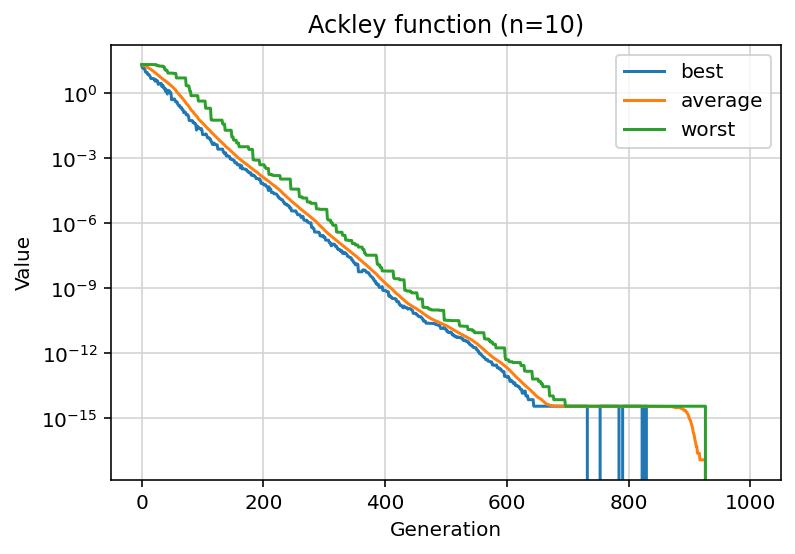

In [6]:
%matplotlib inline

fig, ax = plt.subplots()
ax.set_title('Ackley function (n=10)')
ax.plot(generation, stats_min, label="best")
ax.plot(generation, stats_ave, label="average")
ax.plot(generation, stats_max, label="worst")
ax.set_xlabel('Generation')
ax.set_ylabel('Value')
ax.set_yscale('log')
ax.grid(which='both', color='lightgrey')
ax.legend()

## Rosenbrock function

In [11]:
GEN = 100
N_DIM = 2
G_MIN = -5
G_MAX = 5
POP_SIZE = 300
PARENT_NUM = 50
CHILD_NUM = 200

EVALTYPE = alternation.evalType.MINIMIZE
CROSSTYPE = crossover.crossoverType.E_UNDX
RANDOMTYPE = crossover.randomType.UNIFORM

In [12]:
# object for JGG alternation
pop = alternation.JGG(dim=N_DIM,
                      evaluation_func=rosenbrock, evaluation_type=EVALTYPE,
                      gene_min=G_MIN, gene_max=G_MAX,
                      crossover_type=CROSSTYPE,
                      random_type=RANDOMTYPE,
                      pop_size=POP_SIZE, parent_num=PARENT_NUM, child_num=CHILD_NUM,
                      seed=64)

# make initial population
pop.init_population()

# evaluate initial population
pop.eval()

<IPython.core.display.Javascript object>


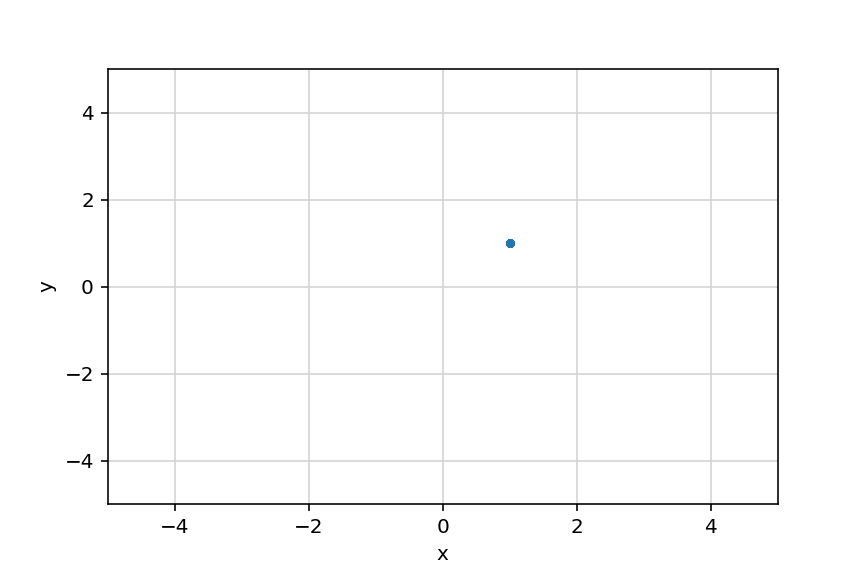

In [13]:
%matplotlib nbagg

fig, ax = plt.subplots()

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.grid(which='both', color='lightgrey')
artists = []

generation = []
stats_min = []
stats_max = []
stats_ave = []

generation.append(0)
stats_min.append(numpy.min([ind.fitness for ind in pop.population]))
stats_max.append(numpy.max([ind.fitness for ind in pop.population]))
stats_ave.append(numpy.average([ind.fitness for ind in pop.population]))

_tmp = numpy.array(pop.population)
im = ax.scatter(_tmp[:,0], _tmp[:,1], s=10)
artists.append([im])

for i in range(GEN):
    pop.generation_step()
    
    generation.append(i+1)
    stats_min.append(numpy.min([ind.fitness for ind in pop.population]))
    stats_max.append(numpy.max([ind.fitness for ind in pop.population]))
    stats_ave.append(numpy.average([ind.fitness for ind in pop.population]))
    
    if (i+1) % 10 == 0:
        _tmp = numpy.array(pop.population)
        im = ax.scatter(_tmp[:,0], _tmp[:,1], s=10)
        artists.append([im])

anim = ArtistAnimation(fig, artists, interval=1000)
anim.save('rosenbrock_test.gif', writer='imagemagick', fps=4)

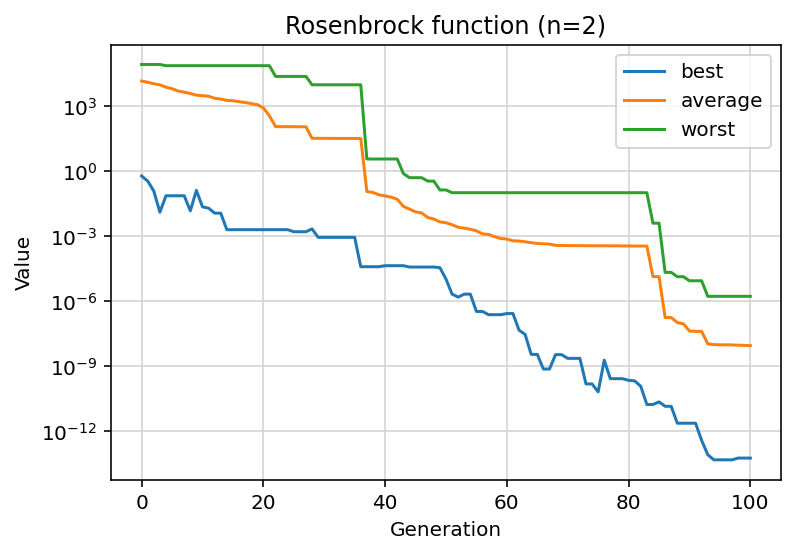

In [15]:
%matplotlib inline

fig, ax = plt.subplots()
ax.set_title('Rosenbrock function (n=2)')
ax.plot(generation, stats_min, label="best")
ax.plot(generation, stats_ave, label="average")
ax.plot(generation, stats_max, label="worst")
ax.set_xlabel('Generation')
ax.set_ylabel('Value')
ax.set_yscale('log')
ax.grid(which='both', color='lightgrey')
ax.legend()